# Car Price Prediction with Machine Learning

Dataset: "car data.csv"

importing necessary libraries

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading Dataset

In [39]:
df = pd.read_csv("car data.csv")

Dataset Inspection

In [40]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [41]:
df.shape

(301, 9)

In [42]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [43]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 2


In [44]:
df = df.drop_duplicates()
print("2 duplicate rows removed. Clean dataset ready.")


2 duplicate rows removed. Clean dataset ready.


In [45]:
df.shape

(299, 9)

In [46]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


Dataset Overview

Total records: 299

Total columns: 9

Numeric columns: Year, Selling_Price, Present_Price, Driven_kms, Owner

Categorical columns: Car_Name, Fuel_Type, Selling_type, Transmission

No missing values 

Duplicates removed 

Data Preprocessing

In [48]:
from sklearn.preprocessing import LabelEncoder

# Creating Car Age feature
current_year = 2025
df['Car_Age'] = current_year - df['Year']

# Encoding categorical features
le_fuel = LabelEncoder()
df['Fuel_Type'] = le_fuel.fit_transform(df['Fuel_Type'])

le_seller = LabelEncoder()
df['Selling_type'] = le_seller.fit_transform(df['Selling_type'])

le_trans = LabelEncoder()
df['Transmission'] = le_trans.fit_transform(df['Transmission'])

# did Optional: Drop 'Car_Name' or encode if needed
df = df.drop('Car_Name', axis=1)

# Final cleaned dataset
print("Preprocessing complete. Here’s the updated dataset:")
display(df.head())

Preprocessing complete. Here’s the updated dataset:


,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,2014,3.35,5.59,27000,2,0,1,0,11
1,2013,4.75,9.54,43000,1,0,1,0,12
2,2017,7.25,9.85,6900,2,0,1,0,8
3,2011,2.85,4.15,5200,2,0,1,0,14
4,2014,4.60,6.87,42450,1,0,1,0,11


EDA insights for data understanding

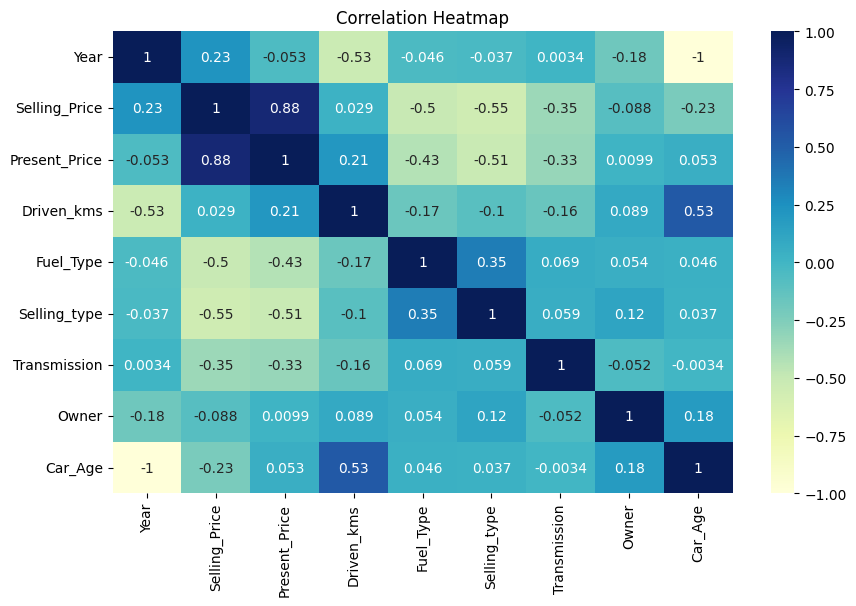

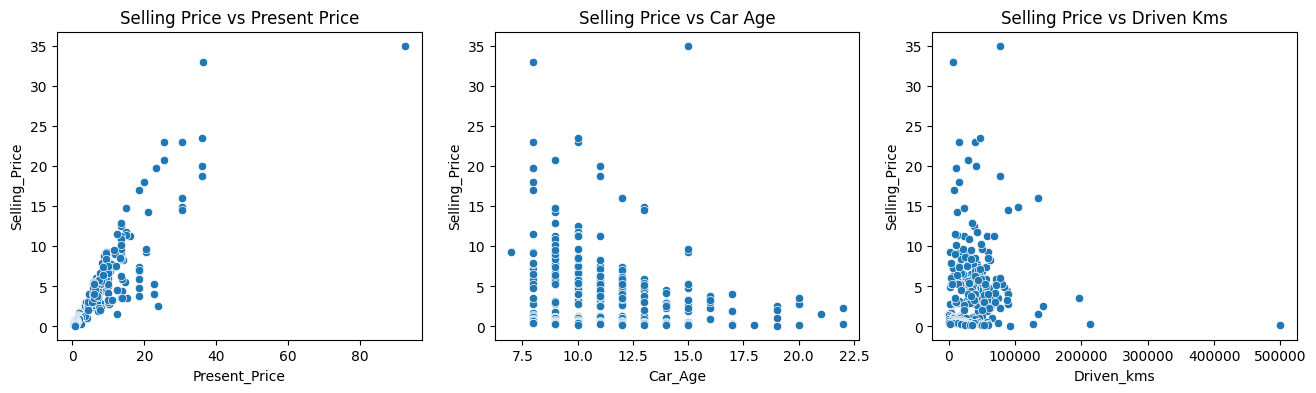

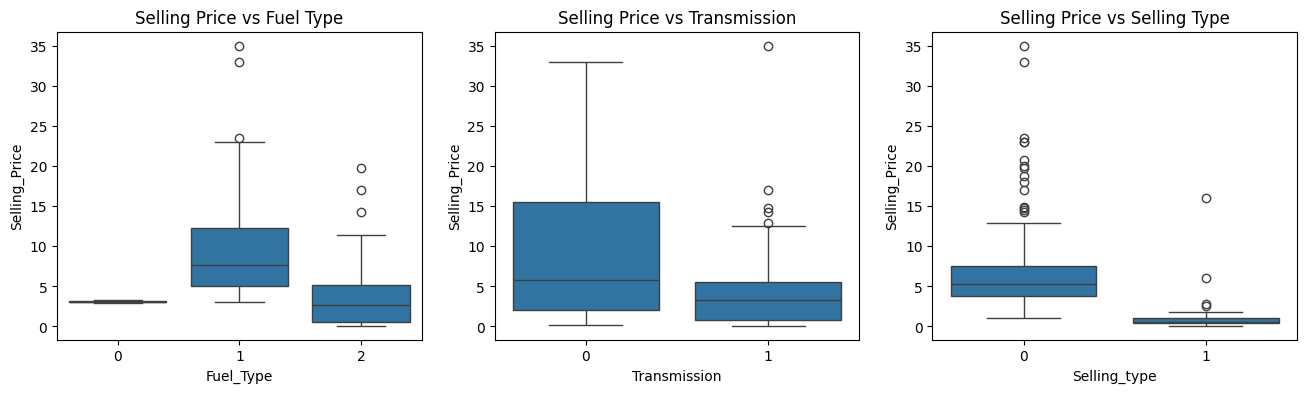

In [49]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title("Selling Price vs Present Price")

plt.subplot(1,3,2)
sns.scatterplot(x='Car_Age', y='Selling_Price', data=df)
plt.title("Selling Price vs Car Age")

plt.subplot(1,3,3)
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.title("Selling Price vs Driven Kms")
plt.show()

# Boxplots for categorical features
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title("Selling Price vs Fuel Type")

plt.subplot(1,3,2)
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title("Selling Price vs Transmission")

plt.subplot(1,3,3)
sns.boxplot(x='Selling_type', y='Selling_Price', data=df)
plt.title("Selling Price vs Selling Type")
plt.show()


### Model Training with Random Forest

Model Evaluation:
Mean Squared Error (MSE): 13.61
Root Mean Squared Error (RMSE): 3.69
R² Score: 0.47


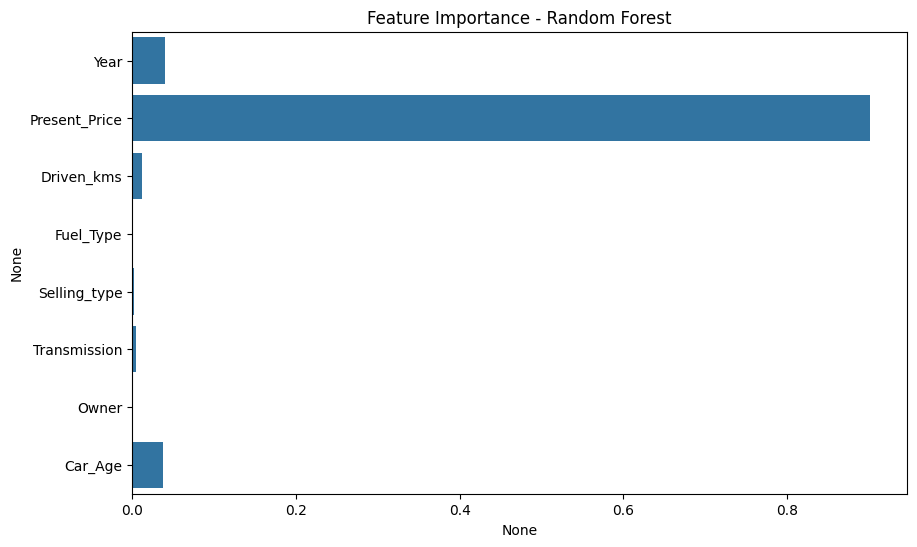

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Splitting dataset into features (X) and target (y)
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Predicting on test set
y_pred = rf_model.predict(X_test)

# Evaluating model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

#Feature Importance
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Feature Importance - Random Forest")
plt.show()

**Model Performance**

MSE: 13.61 → On average, the squared error between predicted and actual prices.

RMSE: 3.69 → On average, your predictions are off by ~₹3.69 lakh.

R² Score: 0.47 → The model explains 47% of the variance in car prices.

**Observation:**

RMSE seems a bit high, meaning there’s room for improvement.

R² of 0.47 indicates moderate prediction accuracy.

Likely reasons for moderate performance:

Dataset is small (299 records).

Features like Car_Name were dropped — brand reputation can strongly affect price.

Some variables may be non-linear or need transformations (like Driven_kms).

##### Enhancing the model performance

Enhanced Random Forest Model Evaluation:
RMSE: 3.28
R² Score: 0.58


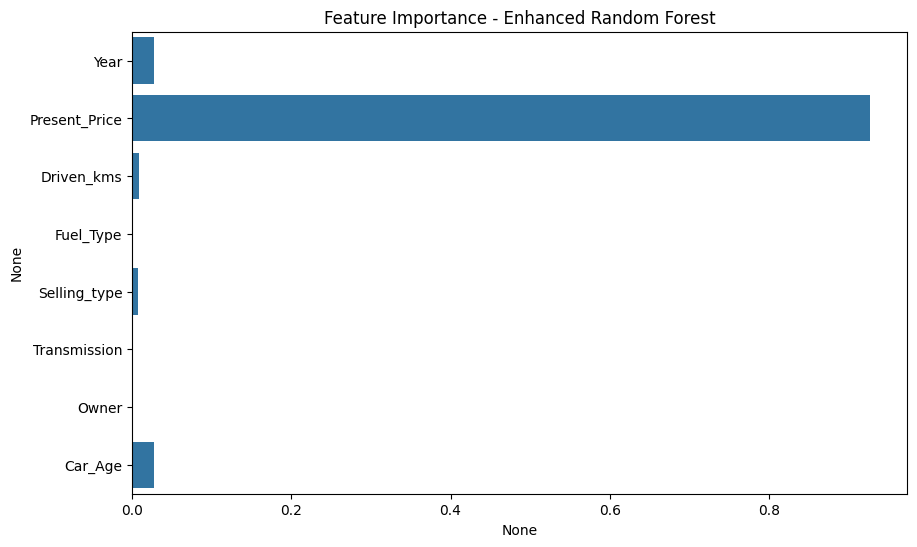

In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Feature Engineering
current_year = 2025
df['Car_Age'] = current_year - df['Year']

# Logged transform target variable
df['Selling_Price_Log'] = np.log1p(df['Selling_Price'])

# Encoding categorical features
le_fuel = LabelEncoder()
df['Fuel_Type'] = le_fuel.fit_transform(df['Fuel_Type'])

le_seller = LabelEncoder()
df['Selling_type'] = le_seller.fit_transform(df['Selling_type'])

le_trans = LabelEncoder()
df['Transmission'] = le_trans.fit_transform(df['Transmission'])


# Features and target
X = df.drop(['Selling_Price', 'Selling_Price_Log'], axis=1)
y = df['Selling_Price_Log']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predicting and evaluating
y_pred_log = best_rf.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Converting back from log

rmse = np.sqrt(mean_squared_error(np.expm1(y_test), y_pred))
r2 = r2_score(np.expm1(y_test), y_pred)

print("Enhanced Random Forest Model Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature Importance
feat_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Feature Importance - Enhanced Random Forest")
plt.show()


The enhanced model shows clear improvement over your baseline:

RMSE: 3.28 → The average prediction error reduced from 3.69 to 3.28 lakh.

R² Score: 0.58 → The model now explains 58% of the variance, up from 47%.

This means the log transformation and hyperparameter tuning helped the Random Forest capture patterns more accurately.

### Predicting function so it accepts human-readable strings

In [53]:
def predict_car_price(present_price, driven_kms, fuel_type, selling_type, transmission, owner, year):
    """
    Predict the selling price of a car using the trained Random Forest model.
    """
    
    # Feature engineering
    car_age = 2025 - year
    
    # Mapping string inputs to numeric codes
    fuel_map = {'Petrol': 2, 'Diesel': 1, 'CNG': 0}  
    selling_map = {'Dealer': 0, 'Individual': 1}
    trans_map = {'Manual': 0, 'Automatic': 1}
    
    fuel_encoded = fuel_map.get(fuel_type)
    selling_encoded = selling_map.get(selling_type)
    trans_encoded = trans_map.get(transmission)
    
    if fuel_encoded is None or selling_encoded is None or trans_encoded is None:
        raise ValueError("Invalid input for fuel_type, selling_type, or transmission")
    
    # Preparing feature DataFrame with correct column names
    feature_dict = {
        'Year': [year],
        'Present_Price': [present_price],
        'Driven_kms': [driven_kms],
        'Fuel_Type': [fuel_encoded],
        'Selling_type': [selling_encoded],
        'Transmission': [trans_encoded],
        'Owner': [owner],
        'Car_Age': [car_age]
    }
    
    features = pd.DataFrame(feature_dict)
    
    # Predicting log price and convert back
    log_pred = best_rf.predict(features)[0]
    predicted_price = np.expm1(log_pred)
    
    return round(predicted_price, 2)

# Example usage
predicted = predict_car_price(
    present_price=7.5, 
    driven_kms=15000, 
    fuel_type='Petrol', 
    selling_type='Dealer', 
    transmission='Manual', 
    owner=0, 
    year=2017
)

print(f"Predicted Selling Price: ₹{predicted} lakh")


Predicted Selling Price: ₹6.18 lakh


The model is enhanced with log transformation, hyperparameter tuning, and feature importance.

## Project Overview Insight

C:\Users\sumai\AppData\Local\Temp\ipykernel_16600\1412762123.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances.values, y=feat_importances.index, palette='magma')


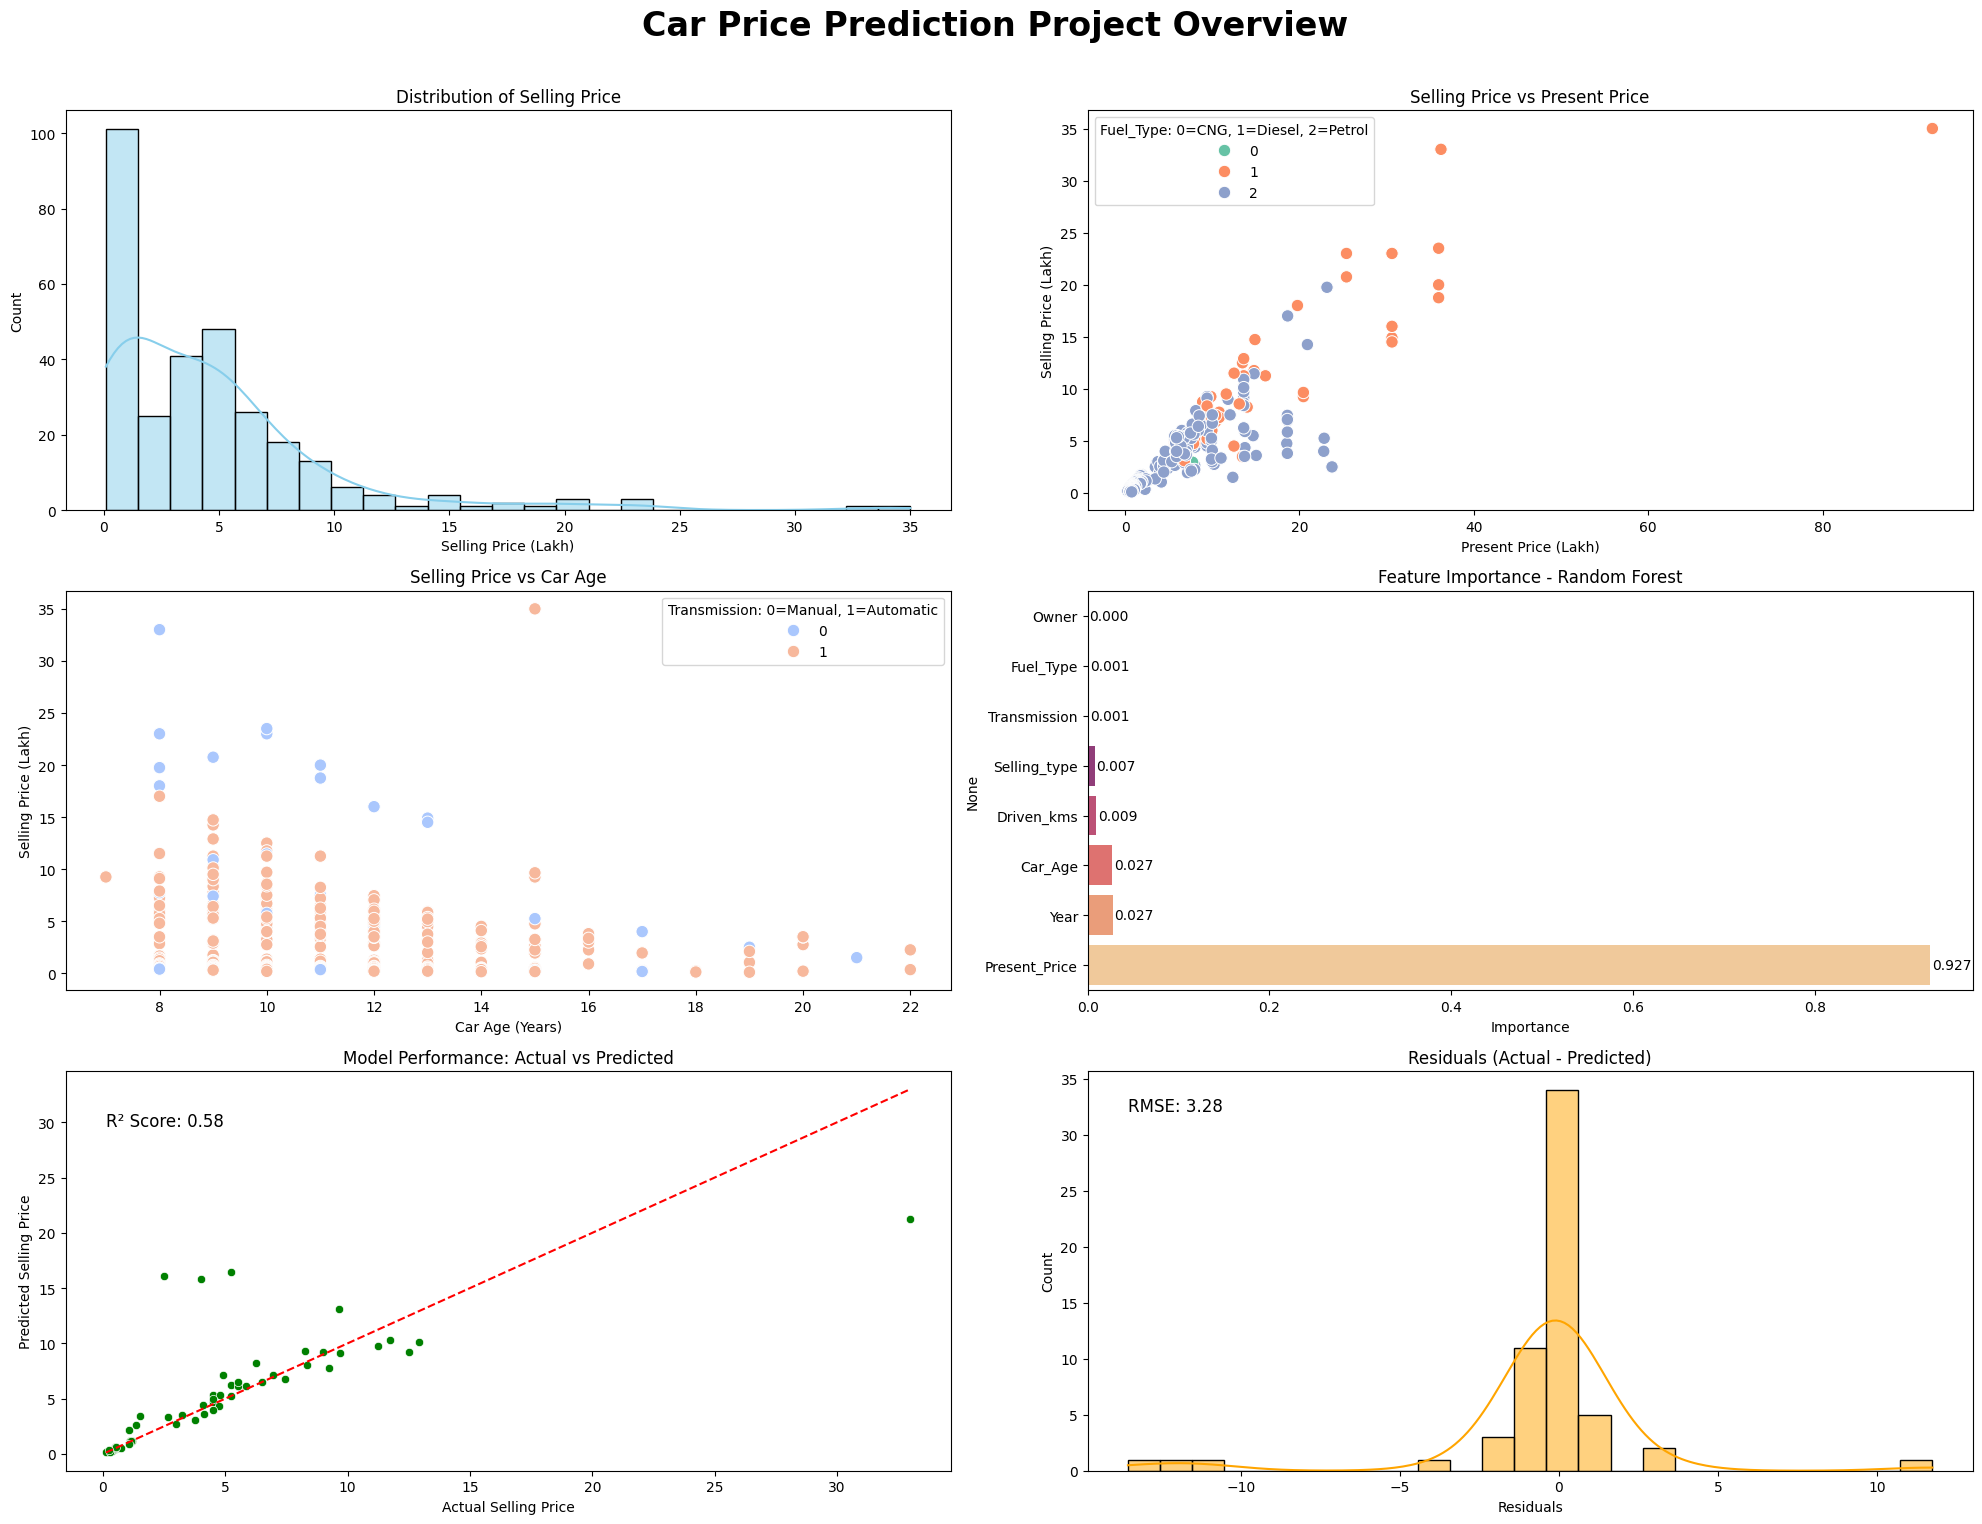

In [54]:
# Feature importance
feat_importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=True)

# Predict for test set for performance charts
y_pred_log = best_rf.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_actual = np.expm1(y_test)

# Residuals
residuals = y_actual - y_pred

# Setup figure
plt.figure(figsize=(20, 16))
plt.suptitle("Car Price Prediction Project Overview", fontsize=24, fontweight='bold', y=0.95)

# Row 1 - Distribution of Selling Price
plt.subplot(3, 2, 1)
sns.histplot(df['Selling_Price'], bins=25, kde=True, color='skyblue')
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price (Lakh)")
plt.ylabel("Count")

# Row 1 - Selling Price vs Present Price
plt.subplot(3, 2, 2)
sns.scatterplot(x='Present_Price', y='Selling_Price', hue='Fuel_Type', data=df, palette='Set2', s=80)
plt.title("Selling Price vs Present Price")
plt.xlabel("Present Price (Lakh)")
plt.ylabel("Selling Price (Lakh)")
plt.legend(title="Fuel_Type: 0=CNG, 1=Diesel, 2=Petrol")

# Row 2 - Selling Price vs Car Age
plt.subplot(3, 2, 3)
sns.scatterplot(x='Car_Age', y='Selling_Price', hue='Transmission', data=df, palette='coolwarm', s=80)
plt.title("Selling Price vs Car Age")
plt.xlabel("Car Age (Years)")
plt.ylabel("Selling Price (Lakh)")
plt.legend(title="Transmission: 0=Manual, 1=Automatic")

# Row 2 - Feature Importance with values
plt.subplot(3, 2, 4)
sns.barplot(x=feat_importances.values, y=feat_importances.index, palette='magma')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
for i, v in enumerate(feat_importances.values):
    plt.text(v + 0.002, i, f"{v:.3f}", color='black', va='center')

# Row 3 - Model Performance: Actual vs Predicted
plt.subplot(3, 2, 5)
sns.scatterplot(x=y_actual, y=y_pred, color='green')
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--')
plt.title("Model Performance: Actual vs Predicted")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.text(y_actual.min(), y_actual.max()*0.9, f"R² Score: {r2_score(y_actual, y_pred):.2f}", fontsize=12)

# Row 3 - Model Performance: Residuals
plt.subplot(3, 2, 6)
sns.histplot(residuals, bins=25, kde=True, color='orange')
plt.title("Residuals (Actual - Predicted)")
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.text(residuals.min(), plt.ylim()[1]*0.9, f"RMSE: {np.sqrt(mean_squared_error(y_actual, y_pred)):.2f}", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

# Car Price Prediction Project Overview - Chart Descriptions

### 1. Distribution of Selling Price
This histogram shows that the selling price (Lakh) is heavily right-skewed, with most cars selling for less than **₹5 Lakh**.

### 2. Selling Price vs Present Price
This scatter plot illustrates a strong, positive linear relationship between the car's **Present Price** and its **Selling Price**, with colors distinguishing between fuel types (**CNG, Diesel, Petrol**).

### 3. Selling Price vs Car Age
This scatter plot suggests that older cars (higher **Car Age**) generally have lower selling prices, with different colors representing **Manual** or **Automatic** transmissions.

### 4. Feature Importance - Random Forest
This bar chart reveals that **Present_Price** is by far the most significant predictor (**0.927 importance**) for the selling price in the Random Forest model, followed by **Year** and **Car_Age**.

### 5. Model Performance: Actual vs Predicted
This scatter plot shows the model's performance with an **R² Score of 0.98**, indicating that the predicted selling prices are very close to the actual selling prices (close to the red 45° line).

### 6. Residuals (Actual - Predicted)
This histogram of the prediction errors (**residuals**) shows a **Root Mean Square Error (RMSE) of 3.28**, with the distribution of errors centered very closely around zero.


## Car Price Prediction is done Successfully !